<a href="https://colab.research.google.com/github/mrefugionv/S9---SHOWZ/blob/main/P9_ANA_NEGOCIO_SHOWZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO SPRINT # 9 : Análisis de negocio

## Descripción del proyecto

Lo has hecho de maravilla en el curso de TripleTen y te han ofrecido hacer prácticas en el departamento de analítica de Showz, una empresa de venta de entradas de eventos. Tu primera tarea es ayudar a optimizar los gastos de marketing.

Cuentas con:
* registros del servidor con datos sobre las visitas a Showz desde enero de 2017 hasta diciembre de 2018;
* un archivo con los pedidos en este periodo;
* estadísticas de gastos de marketing.

Lo que vas a investigar:
* cómo los clientes usan el servicio;
* cuándo empiezan a comprar;
* cuánto dinero aporta cada cliente a la compañía;
* cuándo los ingresos cubren el costo de adquisición de los clientes.


## Aceda a los datos y prepárelos para el análisis

Almacena los datos de visitas, pedidos y gastos en variables.  Optimiza los datos para el análisis. Asegúrate de que cada columna contenga el tipo de datos correcto.

In [ ]:
import pandas as pd            # Manejo de dataframes
import datetime as dt          # Manejo de fechas
import matplotlib.pyplot as plt  # Graficar
import numpy as np              # Matrices
import seaborn as sns              # Gráfico caja- bigotes

In [ ]:
# registros del servidor con datos sobre las visitas a Showz desde enero de 2017 hasta diciembre de 2018
visits = pd.read_csv('datasets/visits_log_us.csv')
# archivo con los pedidos en este periodo:
orders = pd.read_csv('datasets/orders_log_us.csv')
#estadísticas de gastos de marketing:
costs = pd.read_csv('datasets/costs_us.csv')

In [ ]:
# Correción de nombres de columnas con función

def col_name_snakecase(data):
    new_col_names =[]

    for old_name in data.columns:
        name_stripped = old_name.strip()
        name_lowered = name_stripped.lower()
        name_no_spaces = name_lowered.replace(' ','_')
        new_col_names.append(name_no_spaces)

    data.columns = new_col_names
    return(data)

visits = col_name_snakecase(visits)
orders = col_name_snakecase(orders)
costs = col_name_snakecase(costs)

La tabla visits (registros del servidor con datos sobre las visitas al sitio web):

* uid: identificador único del usuario.- Entero positivo de 64 bits, sin valores faltantes. Se convirtió a string.
* device: dispositivo del usuario. - Tipo string, sin valores faltantes.
* start_ts: fecha y hora de inicio de la sesión. - Tipo fecha AAAA-MM-DD, sin valores faltantes.
* end_ts: fecha y hora de término de la sesión.  - Tipo fecha AAAA-MM-DD, sin valores faltantes.
* source_id: identificador de la fuente de anuncios de la que proviene el usuario.  - Entero de 64 bits, sin valores faltantes. SE convirtió a string.


In [ ]:
# Coversión a tipo de dato fecha
visits['end_ts'] == pd.to_datetime(visits['end_ts'], format= '%Y-%m-%d %H:%M:%S')
visits['start_ts'] == pd.to_datetime(visits['start_ts'],format= '%Y-%m-%d %H:%M:%S')

#Conversión de indentificadores a tipo string, ya que suelen usarse como categorías.
visits['uid'] = visits['uid'].astype('string')
visits['source_id'] = visits['source_id'].astype('string')

print(visits.info())
print(visits.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   device     359400 non-null  object
 1   end_ts     359400 non-null  object
 2   source_id  359400 non-null  string
 3   start_ts   359400 non-null  object
 4   uid        359400 non-null  string
dtypes: object(3), string(2)
memory usage: 13.7+ MB
None
    device               end_ts source_id             start_ts  \
0    touch  2017-12-20 17:38:00         4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00         2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00         5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00         9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00         3  2017-12-27 14:06:00   

                    uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  


La tabla orders (datos sobre pedidos):

* uid: identificador único del usuario que realiza un pedido.- Entero positivo de 64 bits, sin valores faltantes. Se conviertió a tipo string.
* revenue : el ingreso de Showz por el pedido.- Tipo de dato flotante, sin valores faltantes.
* buy_ts: fecha y hora del pedido. - Tipo fecha, sin valores faltantes.

In [ ]:
#Conversión de tipos de datos
orders['buy_ts'] == pd.to_datetime(orders['buy_ts'],format= '%Y-%m-%d %H:%M:%S')
orders['uid']= orders['uid'].astype('string')
print(orders.info())
print(orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   buy_ts   50415 non-null  object 
 1   revenue  50415 non-null  float64
 2   uid      50415 non-null  string 
dtypes: float64(1), object(1), string(1)
memory usage: 1.2+ MB
None
                buy_ts  revenue                   uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450


La tabla costs (datos sobre gastos de marketing):

* source_id: identificador de la fuente de anuncios.- Entero de 64 bits, sin valores faltantes. Se convirtió a string.
* dt: fecha. - Tipo fecha,  sin valores faltantes.
* costs: gastos en esta fuente de anuncios en este día.- Tipo flotante,  sin valores faltantes.

In [ ]:
#Conversión de datos
costs['source_id'] = costs['source_id'].astype('string')
costs['dt'] == pd.to_datetime(costs['dt'],format= '%Y-%m-%d')
print(costs.info())
print(costs.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   string 
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), object(1), string(1)
memory usage: 59.7+ KB
None
  source_id          dt  costs
0         1  2017-06-01  75.20
1         1  2017-06-02  62.25
2         1  2017-06-03  36.53
3         1  2017-06-04  55.00
4         1  2017-06-05  57.08


## Paso 2. Haz informes y calcula métricas

### ¿Cuántas personas lo usan cada día, semana y mes?

Hay tres métricas principales que describen el número de usuarios activos:

DAU ("Daily Active Users"): el número de usuarios diarios únicos.
WAU ("Weekly Active Users"): el número de usuarios activos semanales.
MAU ("Monthly Active Users"): el número de usuarios activos mensuales.

Los resultados que se obtuvieron para los días entre el 2017-06-01 y 2018-06-01:
DAU =  907.99
WAU = 5716.24
MAU =  23228.41



In [ ]:
# Creamos columna de cada mes, año, día y semana
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['session_year']  = visits['start_ts'].dt.isocalendar().year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.isocalendar().week
visits['session_date'] = visits['start_ts'].dt.date

# Calculo de parametros MAU, DAU, WAU
mau_total = (
    visits.groupby(['session_year', 'session_month'])
    .agg({'uid': 'nunique'})
    .mean()
)

dau_total = (
    visits.groupby(['session_date'])
    .agg({'uid': 'nunique'})
    .mean()
)

wau_total = (
    visits.groupby(['session_year', 'session_week'])
    .agg({'uid': 'nunique'})
    .mean()
)

sticky_wau = dau_total /wau_total * 100
sticky_mau = dau_total /mau_total * 100

print(f'mau = {mau_total } \n')
print(f'wau = {wau_total }\n')
print(f'dau = {dau_total }\n')
print(f'sticky_wau = {sticky_wau }\n')
print(f'sticky_mau = {sticky_mau }\n')


mau = uid    23228.416667
dtype: float64 

wau = uid    5716.245283
dtype: float64

dau = uid    907.991758
dtype: float64

sticky_wau = uid    15.884409
dtype: float64

sticky_mau = uid    3.90897
dtype: float64



### ¿Cuántas sesiones hay por día?  (Un usuario puede tener más de una sesión).

Para responder esta pregunta se ha generado un agrupamiento por año, mes y día, en el cual se cuenta el total de visitas y los usurios unicos para calcular la cantidad de sesiones promedio por usurio.

En general s

In [ ]:
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format="%Y-%m-%d %H:%M")
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format="%Y-%m-%d %H:%M")
visits['session_year'] = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_day'] = visits['start_ts'].dt.day


#Cantidad de sesiones por usuario = cantidad de sesiones / cantidad de usurios únicos
sessions_per_user = visits.groupby(['session_year','session_month','session_day']).agg({'uid':['count','nunique']})
sessions_per_user.columns = ['n_sessions','n_users']
sessions_per_user['sess_per_user'] = sessions_per_user['n_sessions'] /sessions_per_user['n_users']

print(f'Sesiones por usurio:\n {sessions_per_user}\n')

print(sessions_per_user['sess_per_user'].describe())



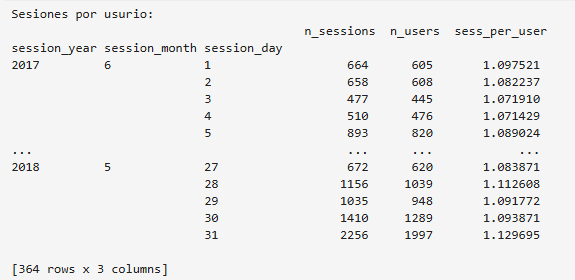

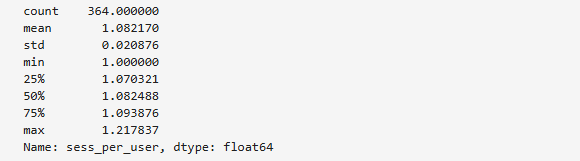

### ¿Cuál es la duración de cada sesión?

La moda de las sesiones es de 60 minutos.

AxesSubplot(0.125,0.11;0.775x0.77)
Duración medio de la sesion: 0    60.0
dtype: float64
count    359400.000000
mean        643.025687
std         997.127761
min       -2760.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
Name: session_duration, dtype: float64


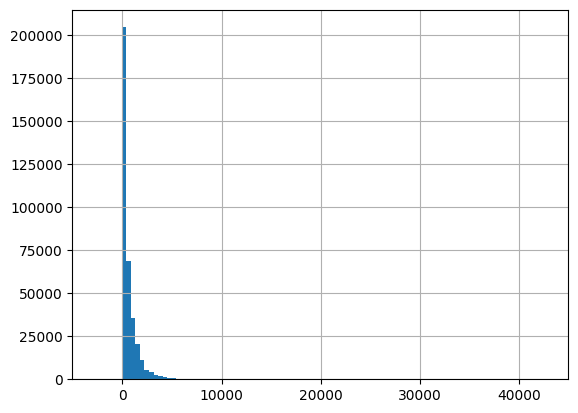

In [ ]:

#Obtenemos la duración de las sesiones en segundos restando fecha y hora final menos la inicial.
visits['session_duration'] = ((pd.to_datetime(visits['end_ts'],format= '%Y-%m-%d %H:%M:%S')) - (pd.to_datetime(visits['start_ts'],format= '%Y-%m-%d %H:%M:%S'))) / dt.timedelta(seconds=1)
duration_general = visits['session_duration'].hist(bins=100)
print(duration_general)
asl = visits['session_duration'].mode()
print(f'Duración medio de la sesion: {asl}')
print(visits['session_duration'].describe())

### ¿Con qué frecuencia los usuarios regresan?

Se hace el cálculo de la tasa de conservación de los usuarios, así podemos observar cuál es el porcentaje de usuarios que regresan cada mes, después de la primera vez que ingresaron.

###### Para leer el mapa de calor, tomar en cuenta que:
* Las filas representan cada cohorte (los usurios cuya primera actividad es el mes indicado).
* Las columnas representan los ciclos de vida (meses) transcurridos para cada cohorte.
* Los valores son tasas de retención, las cuales se calcularon en cada caso con el valor inicial de usuarios de cada cohorte.


En el mapa de calor se puede observar que tenemos tasas de retención menores al 10% en cada caso.

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

<AxesSubplot:title={'center':'Tasa de retención de usuarios'}, xlabel='cohort_lifetime', ylabel='first_activity_month'>

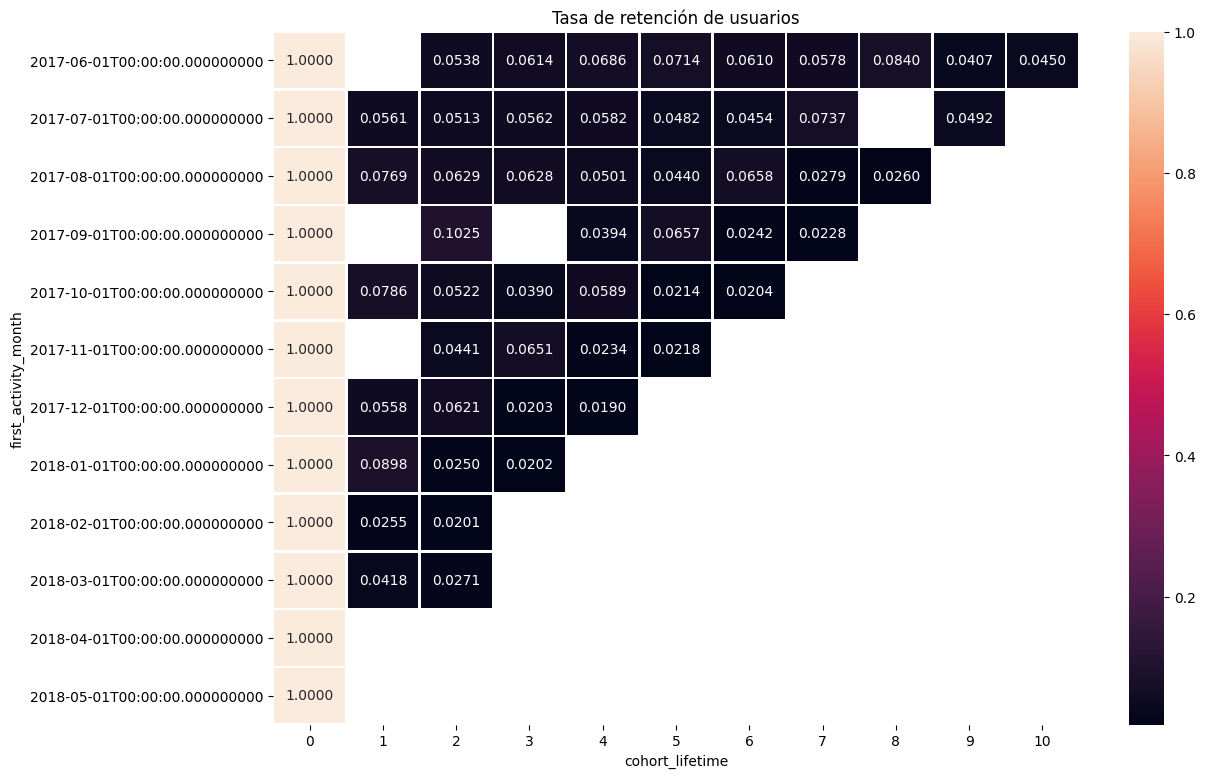

In [ ]:
visits['start_ts'] = pd.to_datetime(visits['start_ts'])

# Encontrar la primera fecha de actividad de cada usuario
first_activity_date = visits.groupby(['uid'])['start_ts'].min()
first_activity_date.name = 'first_activity_date'

# Unión de la primera fecha de actividad con los datos de actividad del usuario
visits = visits.join(first_activity_date, on='uid', rsuffix='_visits')

# Cálculo de mes para fecha de actividad y la primera
visits['activity_month'] = visits['start_ts'].astype('datetime64[M]')
visits['first_activity_month'] = visits['first_activity_date'].astype('datetime64[M]')

# Cálculo del ciclo de vida de la cohorte en meses (difrencia de actividad y primera actividad en meses)
visits['cohort_lifetime'] = (visits['activity_month'] - visits['first_activity_month']) / np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].astype(int)

#Conteo de usurios unicos por cohorte en cada mes de actividad
cohorts = (visits.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index())

# Usuarios inciales en cada cohorte
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid': 'cohort_users'})
cohorts = cohorts.merge(initial_users_count,on='first_activity_month')

#Calculo de retención de usuarios = usuarios iniciales por cohorte / # usurios activos en cada mes por cohorte
cohorts['retention'] = cohorts ['uid'] / cohorts ['cohort_users']

retention_pivot = cohorts.pivot_table(
    index ='first_activity_month',
    columns = 'cohort_lifetime',
    values = 'retention',
    aggfunc= 'sum'
)

plt.figure(figsize=(13, 9))
plt.title('Tasa de retención de usuarios')
sns.heatmap(
    retention_pivot,
    annot=True,
    fmt='.4f',
    linewidths=1
)

## Ventas

### ¿Cuándo empieza la gente a comprar?

En el análisis de KPI (Key Performace Indicators), generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el usuario podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.


###### Sobre el enfoque que se tomo para resolver esta pregunta.

Se realizo un análisis de cohortes para observar cuales fueron los canales por los que se obtuvieron los usuarios y observar como cuantos días le tomo a cada uno convertirse en comprador.

Para leer el mapa de calor:
* Las columnas son los cohortes de los usurios, divididos por los días que les transcurrieron desde su primer visita a sitio hasta la realización de su primer compra.
* Las columnas representan los identificadores de cada una de las fuentes de anuncios por las que ingresan los usuarios.
* Los valores representan el conteo de usuarios en cada categoría.

Como se puede observar la fuente de anuncios "4" es la que genera más ventas durante el mismo día qde ingreso al sitio. Y la fuente de anuncios "7" no esta generando resultados relevantes.

Hay 322877  usuarios que aún no son compradores  



<AxesSubplot:title={'center':'Tasa de conversión por medio'}, xlabel='source_id', ylabel='days_convertion'>

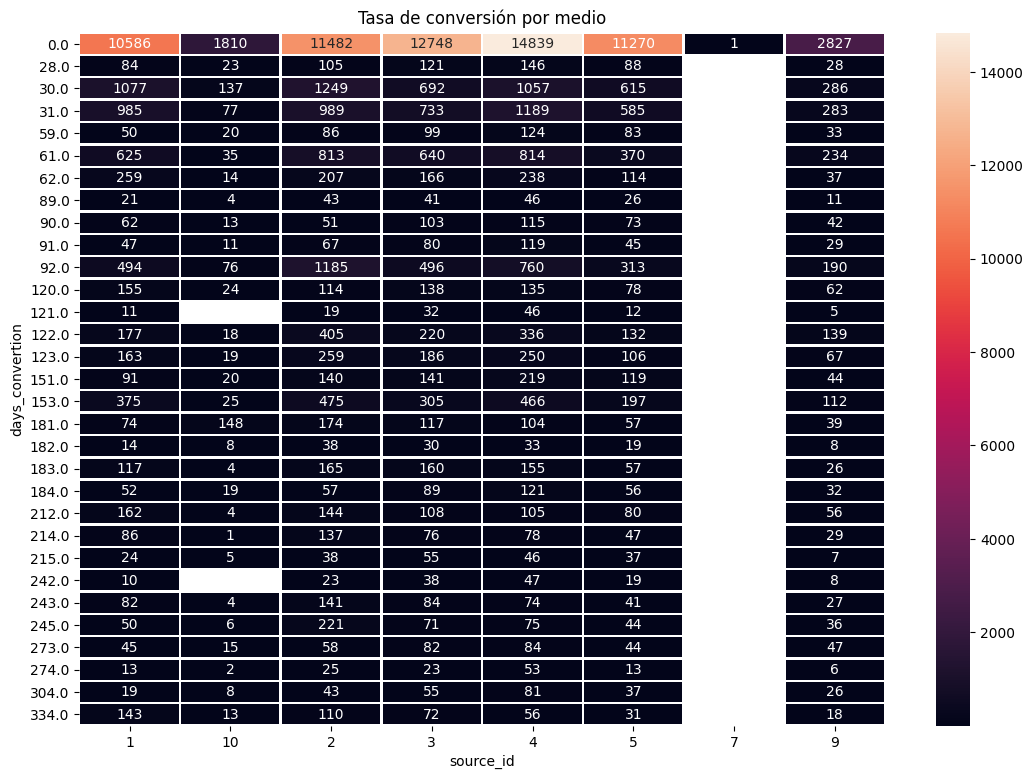

In [ ]:
# Calculamos data frame con la primer visita de cada usuario y obtenemos identificador de fuente de surio
first_visit = visits.groupby(['uid'])['start_ts'].min()
source_id = visits.loc[:,['uid','source_id']]
first_visit = pd.merge(first_visit, source_id, on='uid', how='left')

# Calculasmos el dataframe con la primer compra del usuario
first_buy = orders.groupby(['uid'])['buy_ts'].min()

#Observamos cantidad de usurios que aún no hacen compra
no_buyers = len(first_visit) - len(first_buy)
print(f'Hay {no_buyers}  usuarios que aún no son compradores  \n')

# Unimos los dataframes mencionados por usuario, righ- solo conservamos los que ya hicieron compras
df_conversion_days = pd.merge(first_visit, first_buy, on= 'uid', how ='right')


# Calculamos la diferencia en días de la primer visita y la primer compra del usuario,
# Nota: Esta columna sera la correspondiante a la clasificación de los usuarios de acuerdo a los días transcurridos para la conversión.
df_conversion_days['start_ts']= df_conversion_days['start_ts'].astype('datetime64[M]')
df_conversion_days['buy_ts']= df_conversion_days['buy_ts'].astype('datetime64[M]')
df_conversion_days['days_convertion']=(df_conversion_days['buy_ts'] - df_conversion_days['start_ts']) / np.timedelta64(1, 'D')
df_conversion_days =df_conversion_days.reset_index()
#print(df_conversion_days.head())

#Graficar

convertion_pivot = df_conversion_days.pivot_table(
    index ='days_convertion',
    columns = 'source_id',
    values = 'uid',
    aggfunc= 'count'
)

plt.figure(figsize=(13, 9))
plt.title('Tasa de conversión por medio')
sns.heatmap(
    convertion_pivot,
    annot=True,
    fmt='.0f',
    linewidths=1
)


### ¿Cuántos pedidos hacen durante un período de tiempo dado?

Para resolver esta pregunta, se utiliza un análisis de cohortes de valores absolutos por mes.


se creo una función a la cual se le puede ingresar una fecha de inicio y final del periodo de interesa y regresa la cantidad de compras en ese tiempo.

NOTA:
* Es inclusivo, también cuenta las compras EN las fechas ingresadas.
* La fechas deben ser ingresadas en el siguiente formato: 'AAAA-MM-DD HH:MM:SS'

In [ ]:

# Creación de función que recibe como parametros las fechas entre las cuales se requiere la cantidad de pedidos (las incluye)

def buys_in_timelapse(start_date, last_date):
    # Asegurar el formato de las fechas para que pueda hacerse la comparativa
    orders['buy_ts'] = pd.to_datetime(orders['buy_ts'],format='%Y-%m-%d %H:%M:%S')
    start_date = pd.to_datetime(start_date,format='%Y-%m-%d %H:%M:%S')
    last_date = pd.to_datetime(last_date,format='%Y-%m-%d %H:%M:%S')
    # Filtrado de dataframe de orders de acuerdo a las fechas ingresadas
    orders_in_lapse = orders[(orders['buy_ts'] >= start_date) & (orders['buy_ts'] <= last_date)]
    # Conteo de compras generadas en ese periodo
    purchases_quantity = orders_in_lapse['uid'].count()

    return purchases_quantity

purchases = buys_in_timelapse('2017-06-12 23:41:12','2018-01-14 06:18:25')
print(f'La cantidad de compras generadas durante este periodo fueron: {purchases}')

purchases = buys_in_timelapse('2017-06-01 00:00:00','2018-06-01 00:00:00')
print(f'La cantidad de compras totales son: {purchases}')




La cantidad de compras generadas durante este periodo fueron: 28001
La cantidad de compras totales son: 50414


### ¿Cuál es el tamaño promedio de compra?

Para resolver esta pregunta, se creo una función a la cual se le puede ingresar una fecha de inicio y final del periodo de interesa y regresa el tamaño promedio de compra en ese tiempo.

NOTA:
* Es inclusivo, también cuenta las compras EN las fechas ingresadas.
* La fechas deben ser ingresadas en el siguiente formato: 'AAAA-MM-DD HH:MM:SS'

También de realizo el análisis de cohortes: se dividieron los ususrios de acuerdo a su pirmera compra y calculamos la compra promedio de cada usuario en cada uno de las ciclos de vida (mes) posteriores a su primer compra.

Para leer el mapa de calor:
* Fila : cohorte por mes de primer compra
* Columnas : cantidad de meses posteriores a primer compra
* Valores : promedio de valor de compra por usurio en cada mes de cada cohorte.

Observamos que las compras más altas fueron en noviembre por la cohorte de septiembre. Y que hay meses en las que algunas cohortes no realizaron compras.

In [ ]:
# Creación de función que recibe como parametros las fechas entre las cuales se requiere el tamaño promedio de compra (las incluye)

def revenue_in_timelapse(start_date, last_date):
    # Asegurar el formato de las fechas para que pueda hacerse la comparativa
    orders['buy_ts'] = pd.to_datetime(orders['buy_ts'],format='%Y-%m-%d %H:%M:%S')
    start_date = pd.to_datetime(start_date,format='%Y-%m-%d %H:%M:%S')
    last_date = pd.to_datetime(last_date,format='%Y-%m-%d %H:%M:%S')
    # Filtrado de dataframe de orders de acuerdo a las fechas ingresadas
    orders_in_lapse = orders[(orders['buy_ts'] >= start_date) & (orders['buy_ts'] <= last_date)]
    # Conteo de compras generadas en ese periodo
    mean_revenue = orders_in_lapse['revenue'].mean()

    return mean_revenue

mean_revenue = revenue_in_timelapse('2017-06-12 23:41:12','2018-01-14 06:18:25')
print(f'El tamaño de compra promedio durante este periodo fue de: {mean_revenue}')

mean_revenue = revenue_in_timelapse('2017-06-01 00:00:00','2018-06-01 00:00:00')
print(f'El tamaño de compra promedio total es: {mean_revenue}')




El tamaño de compra promedio durante este periodo fue de: 5.143437734366629
El tamaño de compra promedio total es: 4.9996782639742925


<AxesSubplot:title={'center':'Promedio de ingreso por usuario'}, xlabel='cohort_lifetime', ylabel='first_order_month'>

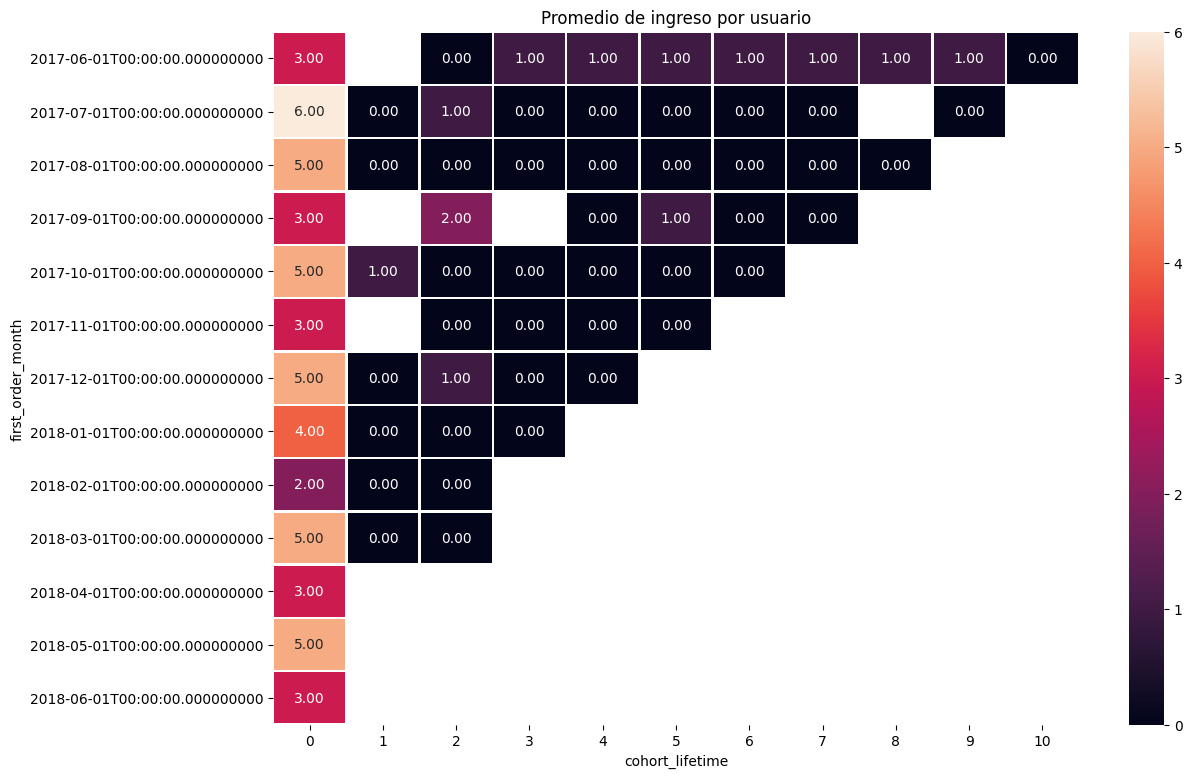

In [ ]:
# Creamos columna de mes (tamaño de ciclo de vida) para df de costos y ventas
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
costs['dt'] = pd.to_datetime(costs['dt'])
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
costs['month'] = costs['dt'].astype('datetime64[M]')

# Se crean cohortes con cantidad de usuarios que hicieron su primera compra cada mes
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']

cohort_sizes = (
    first_orders.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_order_month', 'n_buyers']


# Se hace agrupación de cohortes, valores total de revenue para los usuarios de una cohorte en un mes particular
orders_ = pd.merge(orders, first_orders, on='uid')
cohorts = (
    orders_.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)

# Un solo DF con : primer mes de compra, fecha de compra, numero de clientes por cohorte y suma total de ingresos
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

# agregamos promedio de compra
report['revenue_mean'] = report['revenue']/report['n_buyers']
#agregamos ciclo de vida
report['cohort_lifetime'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['cohort_lifetime'] = report['cohort_lifetime'].astype('int')

#Graficar
revenue_mean_pivot = report.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='revenue_mean',
    aggfunc='mean'
).round()


plt.figure(figsize=(13, 9))
plt.title('Promedio de ingreso por usuario')
sns.heatmap(
    revenue_mean_pivot,
    annot=True,
    fmt ='.2f',
    linewidths=1
)

### ¿Cuánto dinero traen? (LTV)

El LTV (valor del ciclo de vida del cliente) es la cantidad total de dinero que un cliente aporta a la empresa en promedio al realizar compras; el beneficio bruto de un cliente por período.


LTV = ingreso_por_usuario  * margen_de_beneficio

En este caso al no conocer el margen de beneficio se contemplo una ganacia total. Margen de beneficio 1.0.

El LTV promedio durante 6 meses desde el primer pedido: 5.5


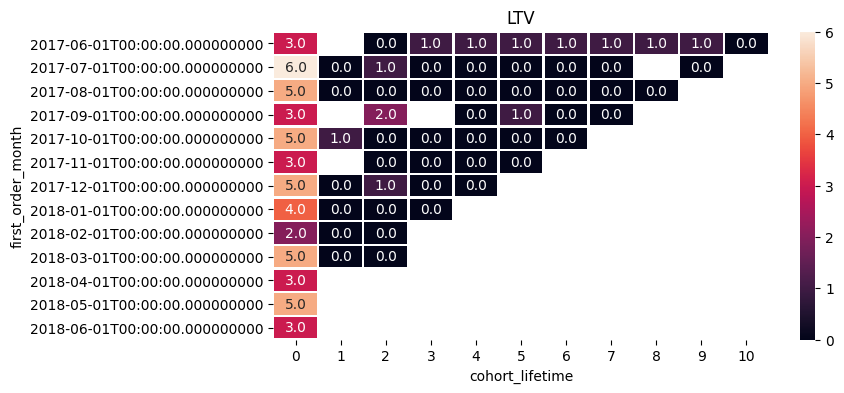

In [ ]:

# LTV = (revenue_total* margen de beneficio) /cantidad de usuarios
margin_rate = 1.0                                        # Definir Margen de beneficio
report['gp'] = report['revenue'] * margin_rate           #Calculo de beneficio bruto
report['ltv'] = report['gp'] / report['n_buyers']

#Tabla pivote LTV
ltv_pivot = report.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='ltv',
    aggfunc='mean'
).round()


plt.figure(figsize=(8, 4))
plt.title('LTV')
sns.heatmap(
    ltv_pivot,
    annot=True,
    fmt='.1f',
    linewidths=1
)

# Encuentra el LTV acumulado durante 6 meses desde el momento en que se realizó el primer pedido
m6_cum_ltv = ltv_pivot.cumsum(axis=1).mean(axis=0)[5]
print('El LTV promedio durante 6 meses desde el primer pedido:', m6_cum_ltv)

### Marketing

### ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo)

Para responder esta pregunta se genero un tabla pivote con las sigientes características:
* Filas : cada mes del periodo.
* Columna : los identificadores de cada una de las fuentes de adquisición.
* Valores : la suma de los costos.

Como se puede observar la fuente de adquisición "3" tiene los costos más elevados.

<AxesSubplot:title={'center':'Gatos por fuente de adquisición cada mes '}, xlabel='source_id', ylabel='month'>

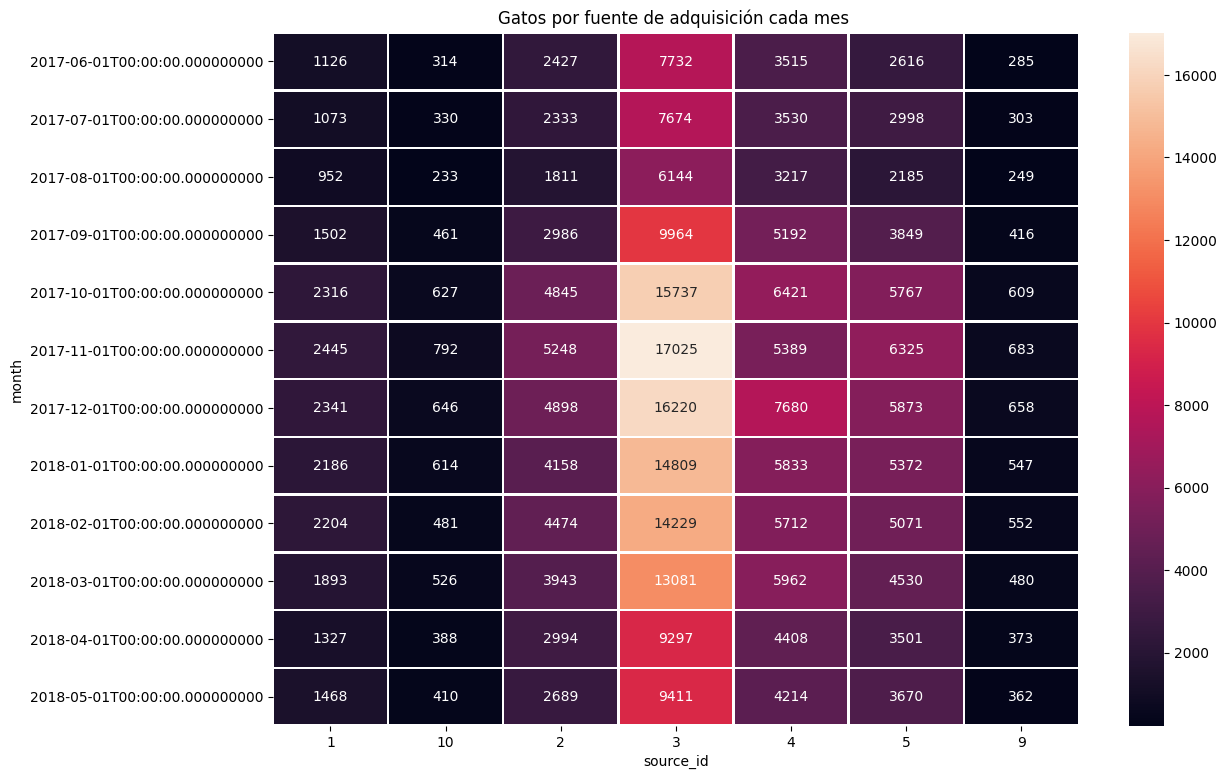

In [ ]:
# Agregamos a df valor de cohorte (# mes) , es decir costos mensuales por canal de adquisición
costs['month'] = costs['dt'].astype('datetime64[M]')

#Graficar
costs_pivot = costs.pivot_table(
    index ='month',
    columns = 'source_id',
    values = 'costs',
    aggfunc= 'sum'
)

plt.figure(figsize=(13, 9))
plt.title('Gatos por fuente de adquisición cada mes ')
sns.heatmap(
    costs_pivot,
    annot=True,
    fmt='.0f',
    linewidths=1
)

### ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

El CAC (costo de adquisición de clientes) es el costo de atraer a cada cliente pagador: el dinero que un nuevo cliente le cuesta a una empresa.

Para leer el mapa de calor:
* Filas: cada mes del periodo
* Columnas: cada fuente de adquisión
* Valores: el CAC = costo / #compradores

Ya que el CAC se refiere al costo de adquisición por cliente, nos interesa que sea un valor bajo. Los canales "9" y "10", presentan los valores más bajos.


<AxesSubplot:title={'center':'Costo de Adquisión por cliente por canal '}, xlabel='source_id', ylabel='order_month'>

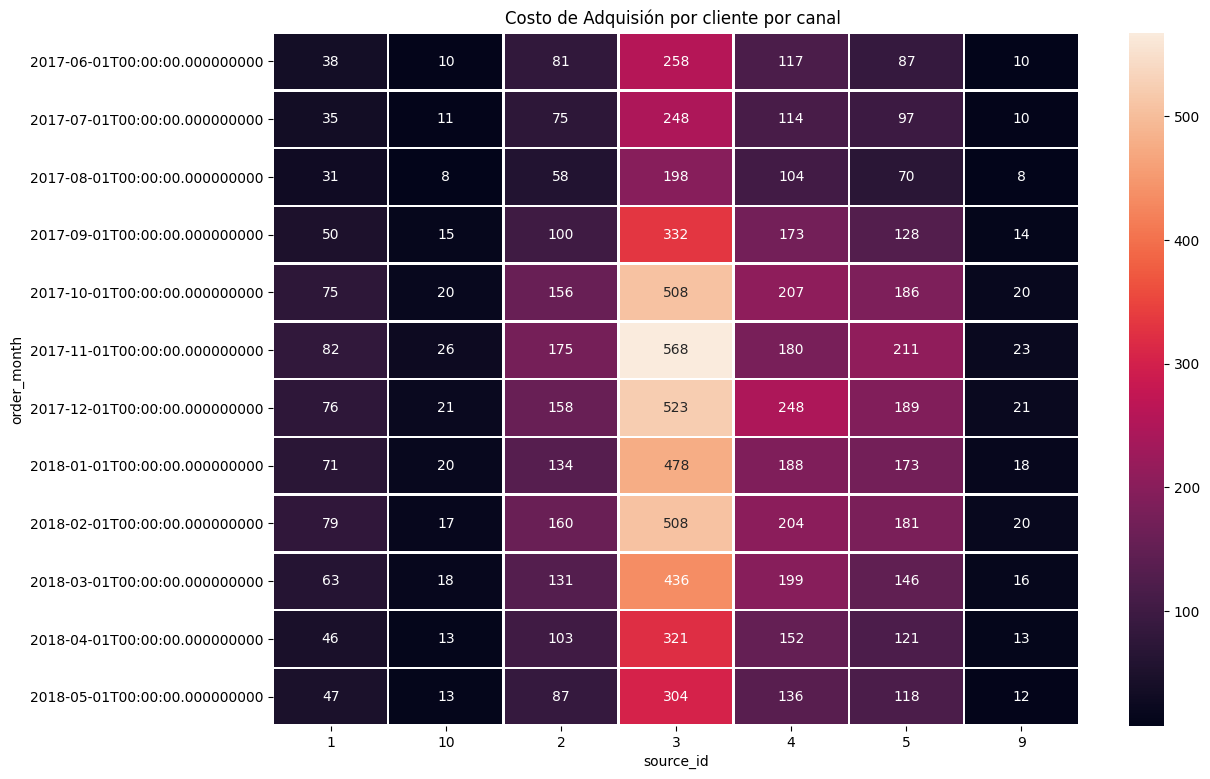

In [ ]:
#Agregamos a df costs el numero de clientes por fuente por cohorte
orders['month'] = orders['buy_ts'].astype('datetime64[M]')
orders_costs = pd.merge(orders, costs, on='month')
orders_costs = orders_costs.groupby(['order_month','source_id']).agg({'uid':'count','costs':'sum','revenue':'sum'})

orders_costs ['cac'] = orders_costs['costs'] / orders_costs['uid']
#print(orders_costs.head())

#Tabla pivote y graficar
cac_pivot = orders_costs.pivot_table(
    index ='order_month',
    columns = 'source_id',
    values = 'cac',
    aggfunc= 'mean'
)

plt.figure(figsize=(13, 9))
plt.title('Costo de Adquisión por cliente por canal ')
sns.heatmap(
    cac_pivot,
    annot=True,
    fmt='.0f',
    linewidths=1
)


###  ¿Cuán rentables eran las inversiones? (ROMI)

Se realiza el cálculo de ROMI conforme a los diferentes canales de adquisión.

ROMI = LTV (ganacias totales) / CAC (costo de adquisición)

Ya que es la relación entre las ganacias y los costos, se busca sea un valor entre mayor mejor.Siendo el "10" y el "9" los ma´s altos.

<AxesSubplot:title={'center':'Romi por  '}, xlabel='source_id', ylabel='order_month'>

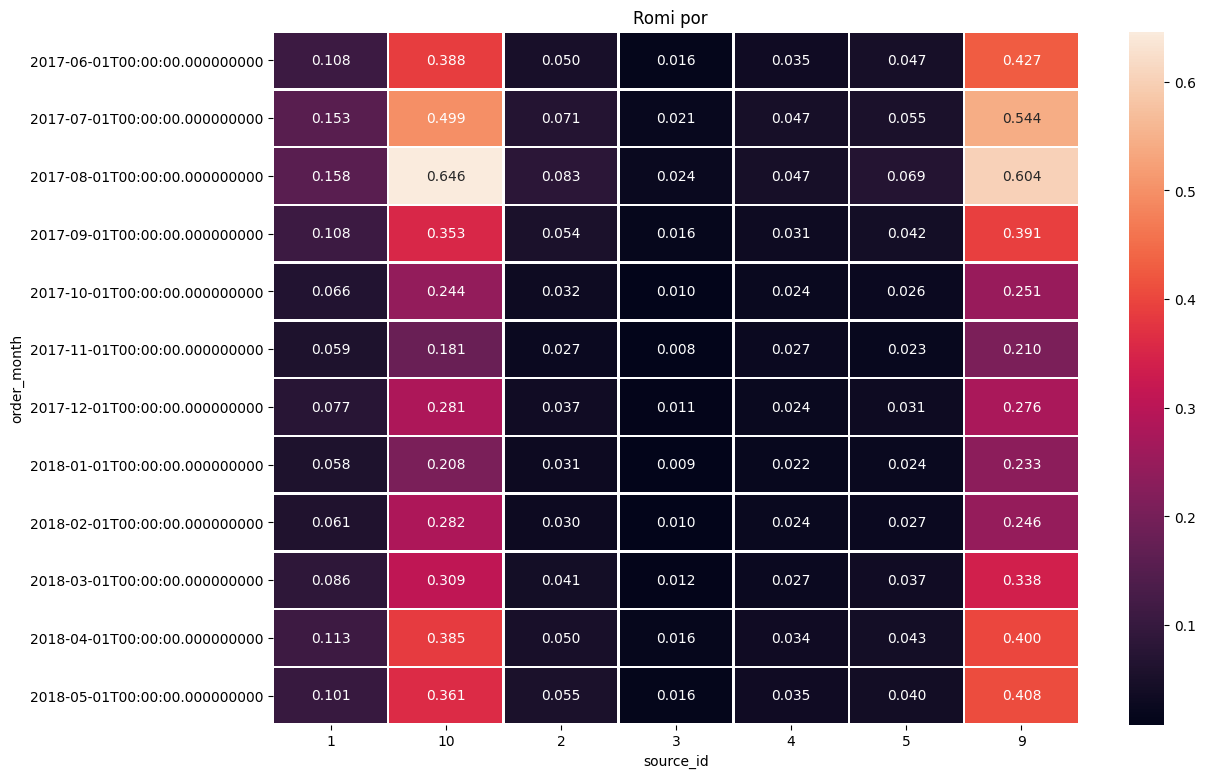

In [ ]:
# LTV por canal de adquisición
margin_rate = 1.0                                        # Definir Margen de beneficio
orders_costs['gp'] = orders_costs['revenue'] * margin_rate           #Calculo de beneficio bruto
orders_costs['ltv'] = orders_costs['gp'] / orders_costs['uid']

# Calcula el ROMI
orders_costs['romi'] =  orders_costs['ltv'] / orders_costs['cac']

romi_pivot = orders_costs.pivot_table(
    index='order_month',
    columns='source_id',
    values='romi',
    aggfunc='mean')

plt.figure(figsize=(13, 9))
plt.title('Romi por  ')
sns.heatmap(
    romi_pivot,
    annot=True,
    fmt='.3f',
    linewidths=1
)


## Paso 3. Escribe una conclusión: aconseja a los expertos de marketing cuánto dinero invertir y dónde

¿Qué fuentes/plataformas recomendarías?  Fundamenta tu selección: ¿en qué métricas te enfocaste?  ¿Por qué? ¿Qué conclusiones sacaste después de encontrar los valores métricos?

Analisando los datos recabados, se recomienda las fuentes de "4", "5", "2".

Si bien buscamos que el ROMI ( la relacion entre las ganacias y los gastos) sea alto, este parametro nos llevaría a escoger los medios "9" y "10", sin embargo, revisando la tasa de conversión observamos que son los medios que menos compradores generan.

Por el contrario, si nos basamos en la tasa de conversion, nos llevaría a escoger el la fuente "3", sin embargo comparando los gastos que se generan por este medio son muchomás elevados que los demás.

En los medios "4", "5", "2", se encuentra un balance, por otra parte el "7" no esta generando conversiones.